In [2]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_column', 50)

In [3]:

from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score


import pickle

In [4]:
train_df=pd.read_excel(r'dataset/House_Rent_Train.xlsx')
train_df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,SEMI_FURNISHED,BOTH,1650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,1,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,1,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,0,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20528 non-null  object 
 2   locality         20395 non-null  object 
 3   activation_date  20532 non-null  object 
 4   latitude         20532 non-null  float64
 5   longitude        20532 non-null  float64
 6   lease_type       20532 non-null  object 
 7   gym              20555 non-null  int64  
 8   lift             20555 non-null  int64  
 9   swimming_pool    20555 non-null  int64  
 10  negotiable       20555 non-null  int64  
 11  furnishing       20555 non-null  object 
 12  parking          20555 non-null  object 
 13  property_size    20555 non-null  int64  
 14  property_age     20532 non-null  float64
 15  bathroom         20532 non-null  float64
 16  facing           20532 non-null  object 
 17  cup_board   

In [6]:
train_df.isna().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [7]:
train_df.nunique()

id                 20523
type                   9
locality            1917
activation_date    19566
latitude           17733
longitude          17726
lease_type             4
gym                    2
lift                   2
swimming_pool          2
negotiable             2
furnishing             3
parking                4
property_size       1141
property_age          44
bathroom               8
facing                 8
cup_board             19
floor                 23
total_floor           27
amenities           4994
water_supply           3
building_type          4
balconies              9
rent                 206
dtype: int64

In [8]:
# Use the duplicated() function to identify duplicates
train_df[train_df.duplicated()]

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
20500,ff808181647075bb01647079241a0118,BHK3,Kasavanahalli,2018-06-07 22:50:00,12.910722,77.677019,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,2500,5.0,3.0,N,4.0,0.0,1.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,1.0,29000.0
20501,ff8081815f0fe396015f13d79a4f5212,BHK1,Basavanagara,13-10-2017 10:52,12.966132,77.681297,FAMILY,0,0,0,0,SEMI_FURNISHED,BOTH,600,3.0,1.0,E,1.0,3.0,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORP_BORE,IH,1.0,9000.0
20502,ff80818160b5a24e0160b5da24c216d2,NaN,Whitefield,2018-02-01 14:41:00,12.978994,77.752149,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1535,5.0,2.0,E,3.0,2.0,5.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,AP,2.0,25000.0
20503,ff8081815fdc759c015fdf0192b900eb,NaN,Jayanagar,22-11-2017 15:50,12.938239,77.584256,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1470,3.0,2.0,N,3.0,2.0,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,AP,0.0,35000.0
20504,ff808181581e545101581f5c5aeb35da,NaN,Sarjapur Road Wipro To Railway Crossing,2017-12-08 13:40:00,12.905571,77.701797,FAMILY,1,1,0,0,SEMI_FURNISHED,BOTH,1400,2.0,3.0,W,3.0,3.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",CORP_BORE,AP,2.0,18000.0
20505,ff8081816451a4760164544ab2eb4943,BHK1,Bellandur,2018-03-07 14:32:00,12.926303,77.675278,FAMILY,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,500,1.0,1.0,N,1.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,1.0,15000.0
20506,ff8081814e322687014e343219020f1b,BHK2,Bommanahalli,2018-12-04 12:53:00,12.904039,77.627142,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,700,3.0,2.0,E,2.0,1.0,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,1.0,13500.0
20507,ff8081815f62b315015f62bc4d96059d,BHK1,Kaggadasapura,28-10-2017 17:40,12.983759,77.678939,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,600,6.0,1.0,E,2.0,5.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,10000.0
20508,ff80818159ded60e0159dfff948e5bcb,BHK1,Ulsoor,2017-11-10 17:08:00,12.979762,77.615395,ANYONE,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,850,30.0,2.0,E,1.0,1.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,20000.0
20509,ff8081815b587dc7015b5c3c0c3d27b8,NaN,"Someshwara Layout,Doddakannelli",22-01-2018 16:58,12.904160,77.691874,ANYONE,1,1,0,0,SEMI_FURNISHED,BOTH,1400,3.0,3.0,E,3.0,2.0,4.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,23000.0


In [9]:
# Drop duplicates based on a specific subset of columns
train_df.drop_duplicates(subset=['id'], keep='first', inplace = True)

In [10]:
print('Unique values in id column:', train_df.id.nunique())

Unique values in id column: 20523


In [11]:
# Here value of the id column is unique. That's why I droped id column
train_df.drop('id', axis=1, inplace = True)
train_df.head()

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [12]:
train_df.type.unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS', '1BHK1', 'bhk2',
       'bhk3', nan], dtype=object)

In [13]:
# Rental Property Type Mapping
train_df['type'] = train_df['type'].str.upper()
train_df['type'] = train_df['type'].str.replace('1BHK1', 'BHK1')
train_df.type.value_counts()

type
BHK2        11686
BHK3         4398
BHK1         3607
RK1           553
BHK4          233
BHK4PLUS       31
Name: count, dtype: int64

In [14]:
train_df.locality.nunique()

1917

In [15]:
# Rental Property Type Mapping
train_df['locality'] = train_df['locality'].str.upper()
train_df.locality.nunique()

1841

In [16]:
train_df.dropna(axis = 0, inplace = True)
train_df.reset_index(drop = True, inplace= True)
train_df.head()

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,BELLANDUR,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
1,BHK3,THIRUVANMIYUR,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
2,BHK1,ATTIGUPPE,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
3,BHK3,KODIHALLI,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
4,BHK1,"SEETHARAMPALYA,HOODI",24-10-2017 18:29,12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0.0,2.0,E,1.0,3.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",CORP_BORE,AP,2.0,18000.0


In [17]:
train_df.activation_date = pd.to_datetime(train_df['activation_date'] )

train_df['activation_year'] = train_df['activation_date'].dt.year
train_df['activation_month'] = train_df['activation_date'].dt.month
train_df['activation_day'] = train_df['activation_date'].dt.day

train_df.drop('activation_date', axis =1, inplace = True)

train_df.head()

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent,activation_year,activation_month,activation_day
0,BHK2,BELLANDUR,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0,2017,9,10
1,BHK3,THIRUVANMIYUR,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0,2018,12,6
2,BHK1,ATTIGUPPE,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0,2018,7,20
3,BHK3,KODIHALLI,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0,2018,5,31
4,BHK1,"SEETHARAMPALYA,HOODI",12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0.0,2.0,E,1.0,3.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",CORP_BORE,AP,2.0,18000.0,2017,10,24


In [18]:
train_df.isna().sum()

type                0
locality            0
latitude            0
longitude           0
lease_type          0
gym                 0
lift                0
swimming_pool       0
negotiable          0
furnishing          0
parking             0
property_size       0
property_age        0
bathroom            0
facing              0
cup_board           0
floor               0
total_floor         0
amenities           0
water_supply        0
building_type       0
balconies           0
rent                0
activation_year     0
activation_month    0
activation_day      0
dtype: int64

In [19]:
#Converting values of the "amenities" column into DataFrame

train_df.amenities.apply(lambda x: json.loads(x))
amenities_df = pd.DataFrame(train_df.amenities.apply(lambda x: json.loads(x)).tolist())
amenities_df.columns = [col.lower() for col in amenities_df.columns]
amenities_df

,lift,gym,internet,ac,club,intercom,pool,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
0,True,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,True,True
1,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
4,True,True,False,False,True,False,True,True,True,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20352,True,False,True,False,False,False,False,False,True,False,True,True,True,True,False,False,True,False,True
20353,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False
20354,True,True,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False
20355,True,False,True,False,False,False,False,True,True,False,True,True,False,True,False,False,True,True,True


In [20]:
for col in amenities_df:
    if col in [i for i in train_df.columns]:
        print(col)

lift
gym


In [21]:
amenities_df.drop(['lift', 'gym', 'pool'], axis=1, inplace = True)
amenities_df.head()

,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
0,False,False,False,False,False,False,False,True,True,False,True,True,True,False,True,True
1,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
4,False,False,True,False,True,True,False,True,False,False,False,False,False,False,True,False


In [22]:
#converting boolean values into numerical value
for col in amenities_df.columns:
    amenities_df[col] = amenities_df[col].apply(lambda x: 1 if x == True else 0)
amenities_df.head()

,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1
1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0


In [23]:
# Concatinating train_df and amenities_df

train_df = pd.concat([train_df, amenities_df], axis = 1)
train_df

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent,activation_year,activation_month,activation_day,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
0,BHK2,BELLANDUR,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0,2017,9,10,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1
1,BHK3,THIRUVANMIYUR,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0,2018,12,6,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1
2,BHK1,ATTIGUPPE,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0,2018,7,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,BHK3,KODIHALLI,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0,2018,5,31,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,BHK1,"SEETHARAMPALYA,HOODI",12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0.0,2.0,E,1.0,3.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",CORP_BORE,AP,2.0,18000.0,2017,10,24,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20352,BHK1,ULSOOR,12.979762,77.615395,ANYONE,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,850,30.0,2.0,E,1.0,1.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,20000.0,2017,11,10,1,0,0,0,0,1,0,1,1,1,1,0,0,1,0,1
20353,BHK2,KORAMANGALA 4TH BLOCK,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10.0,2.0,N,2.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2.0,30000.0,2017,10,19,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
20354,BHK2,KUMARASWAMY LAYOUT,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0.0,2.0,W,2.0,5.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,16000.0,2017,12,21,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
20355,BHK2,INDIRANAGAR,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,E,2.0,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3.0,30000.0,2018,6,28,1,0,0,0,1,1,0,1,1,0,1,0,0,1,1,1


In [24]:
train_df.drop('amenities', axis = 1, inplace = True)
train_df.head()

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,activation_year,activation_month,activation_day,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
0,BHK2,BELLANDUR,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,CORPORATION,AP,2.0,22000.0,2017,9,10,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1
1,BHK3,THIRUVANMIYUR,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,CORP_BORE,AP,3.0,28000.0,2018,12,6,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1
2,BHK1,ATTIGUPPE,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,CORPORATION,IH,0.0,8000.0,2018,7,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,BHK3,KODIHALLI,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,CORPORATION,IH,1.0,45000.0,2018,5,31,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,BHK1,"SEETHARAMPALYA,HOODI",12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0.0,2.0,E,1.0,3.0,5.0,CORP_BORE,AP,2.0,18000.0,2017,10,24,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0


In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20357 entries, 0 to 20356
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              20357 non-null  object 
 1   locality          20357 non-null  object 
 2   latitude          20357 non-null  float64
 3   longitude         20357 non-null  float64
 4   lease_type        20357 non-null  object 
 5   gym               20357 non-null  int64  
 6   lift              20357 non-null  int64  
 7   swimming_pool     20357 non-null  int64  
 8   negotiable        20357 non-null  int64  
 9   furnishing        20357 non-null  object 
 10  parking           20357 non-null  object 
 11  property_size     20357 non-null  int64  
 12  property_age      20357 non-null  float64
 13  bathroom          20357 non-null  float64
 14  facing            20357 non-null  object 
 15  cup_board         20357 non-null  float64
 16  floor             20357 non-null  float6

# Exploratory Data Analysis (EDA)

In [26]:
train_df

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,activation_year,activation_month,activation_day,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
0,BHK2,BELLANDUR,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,CORPORATION,AP,2.0,22000.0,2017,9,10,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1
1,BHK3,THIRUVANMIYUR,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,CORP_BORE,AP,3.0,28000.0,2018,12,6,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1
2,BHK1,ATTIGUPPE,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,CORPORATION,IH,0.0,8000.0,2018,7,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,BHK3,KODIHALLI,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,CORPORATION,IH,1.0,45000.0,2018,5,31,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,BHK1,"SEETHARAMPALYA,HOODI",12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0.0,2.0,E,1.0,3.0,5.0,CORP_BORE,AP,2.0,18000.0,2017,10,24,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20352,BHK1,ULSOOR,12.979762,77.615395,ANYONE,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,850,30.0,2.0,E,1.0,1.0,4.0,CORP_BORE,AP,1.0,20000.0,2017,11,10,1,0,0,0,0,1,0,1,1,1,1,0,0,1,0,1
20353,BHK2,KORAMANGALA 4TH BLOCK,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10.0,2.0,N,2.0,1.0,2.0,CORPORATION,IH,2.0,30000.0,2017,10,19,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
20354,BHK2,KUMARASWAMY LAYOUT,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0.0,2.0,W,2.0,5.0,5.0,BOREWELL,AP,2.0,16000.0,2017,12,21,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
20355,BHK2,INDIRANAGAR,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,E,2.0,2.0,4.0,CORP_BORE,AP,3.0,30000.0,2018,6,28,1,0,0,0,1,1,0,1,1,0,1,0,0,1,1,1


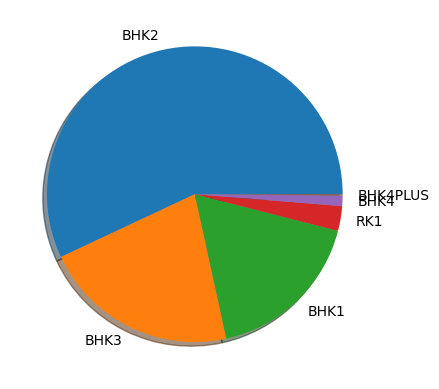

In [27]:
plt.pie(x = train_df.type.value_counts(), shadow = True, labels = train_df.type.unique())
plt.show()

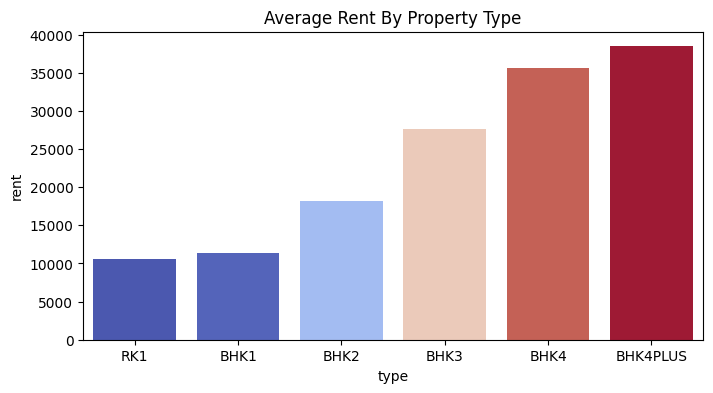

In [28]:
df =train_df.groupby('type')['rent'].mean().sort_values(ascending=True)

plt.figure(figsize = (8,4))
sns.barplot( x = df.index, y=df, hue = df,  palette = "coolwarm", legend = False)
plt.title('Average Rent By Property Type')
plt.show()


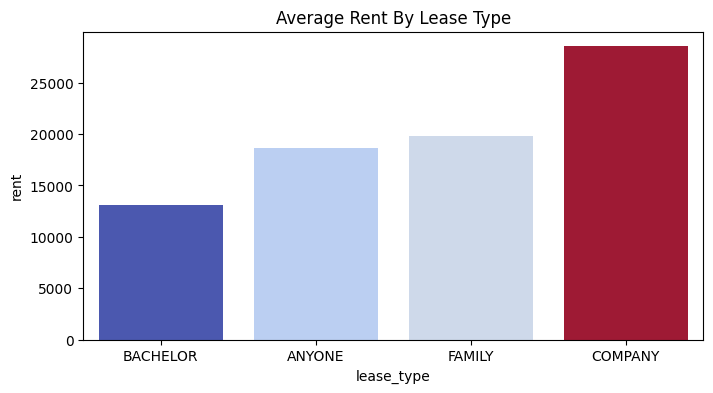

In [29]:
df =train_df.groupby('lease_type')['rent'].mean().sort_values(ascending=True)

plt.figure(figsize = (8,4))
sns.barplot( x = df.index, y=df, hue = df,  palette = "coolwarm", legend = False)
plt.title('Average Rent By Lease Type')
plt.show()

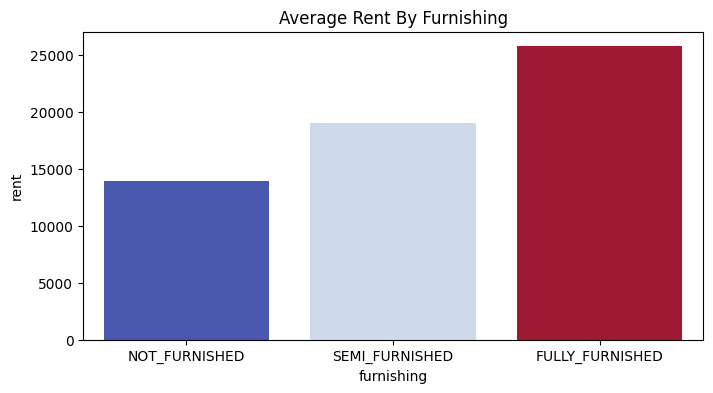

In [30]:
df =train_df.groupby('furnishing')['rent'].mean().sort_values(ascending=True)

plt.figure(figsize = (8,4))
sns.barplot( x = df.index, y=df, hue = df,  palette = "coolwarm", legend = False)
plt.title('Average Rent By Furnishing')
plt.show()

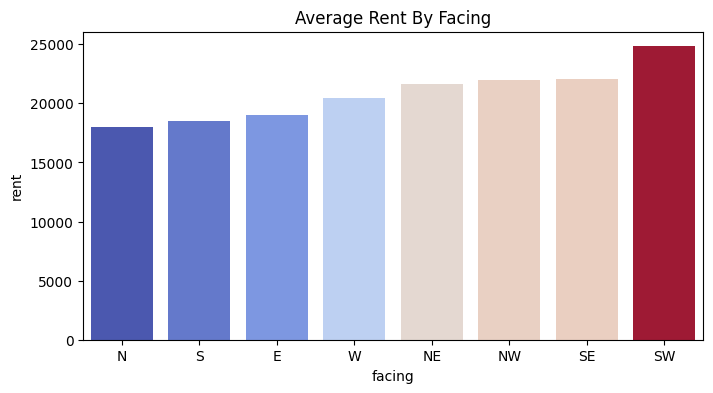

In [31]:
df =train_df.groupby('facing')['rent'].mean().sort_values(ascending=True)

plt.figure(figsize = (8,4))
sns.barplot( x = df.index, y=df, hue = df,  palette = "coolwarm", legend = False)
plt.title('Average Rent By Facing')
plt.show()

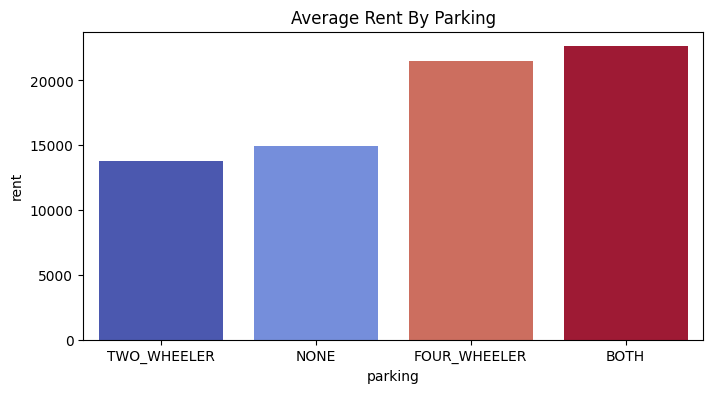

In [32]:
df =train_df.groupby('parking')['rent'].mean().sort_values(ascending=True)

plt.figure(figsize = (8,4))
sns.barplot( x = df.index, y=df, hue = df,  palette = "coolwarm", legend = False)
plt.title('Average Rent By Parking')
plt.show()

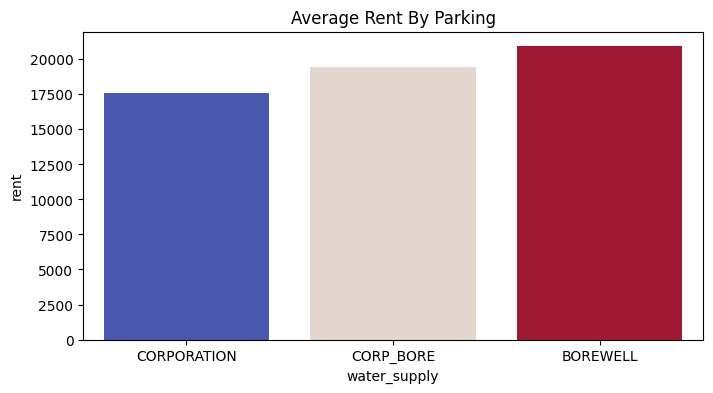

In [33]:
df =train_df.groupby('water_supply')['rent'].mean().sort_values(ascending=True)

plt.figure(figsize = (8,4))
sns.barplot( x = df.index, y=df, hue = df,  palette = "coolwarm", legend = False)
plt.title('Average Rent By Parking')
plt.show()

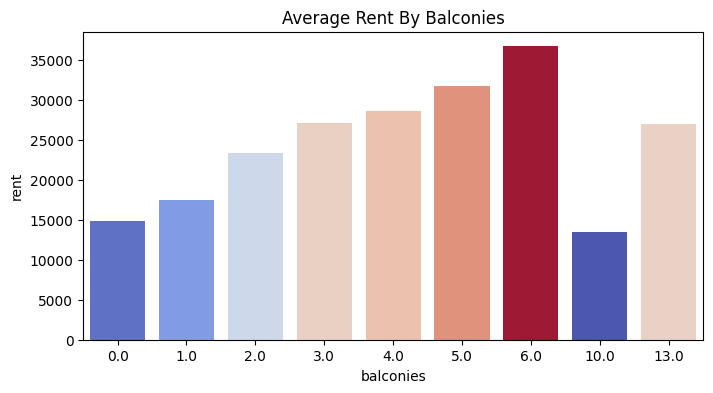

In [34]:
df =train_df.groupby('balconies')['rent'].mean().sort_values(ascending=True)

plt.figure(figsize = (8,4))
sns.barplot( x = df.index, y=df, hue = df,  palette = "coolwarm", legend = False)
plt.title('Average Rent By Balconies')
plt.show()

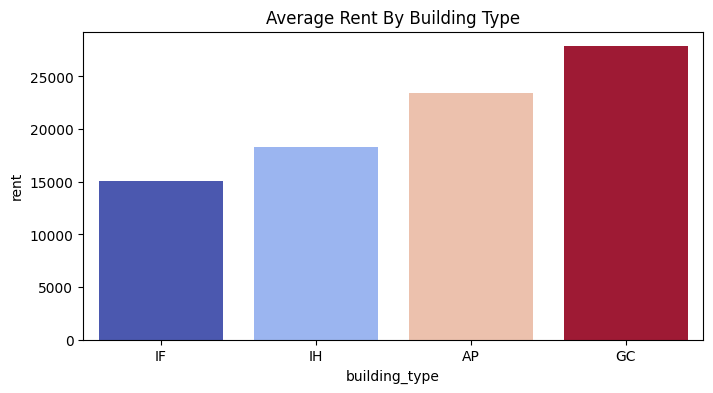

In [35]:
df =train_df.groupby('building_type')['rent'].mean().sort_values(ascending=True)

plt.figure(figsize = (8,4))
sns.barplot( x = df.index, y=df, hue = df,  palette = "coolwarm", legend = False)
plt.title('Average Rent By Building Type')
plt.show()

In [36]:
# len(bool_columns)
def amenities_plot(data):
    plt.figure(figsize=(16, 16))

    for ind, column in enumerate(data):
        plot_no = ind + 1
        plt.subplot(5, 4, plot_no)
        sns.barplot(train_df, x = column, y = 'rent', hue = column, legend = False)
        plt.title(f'Average Rent By {column}')

        plt.tight_layout()

    return plt.show()

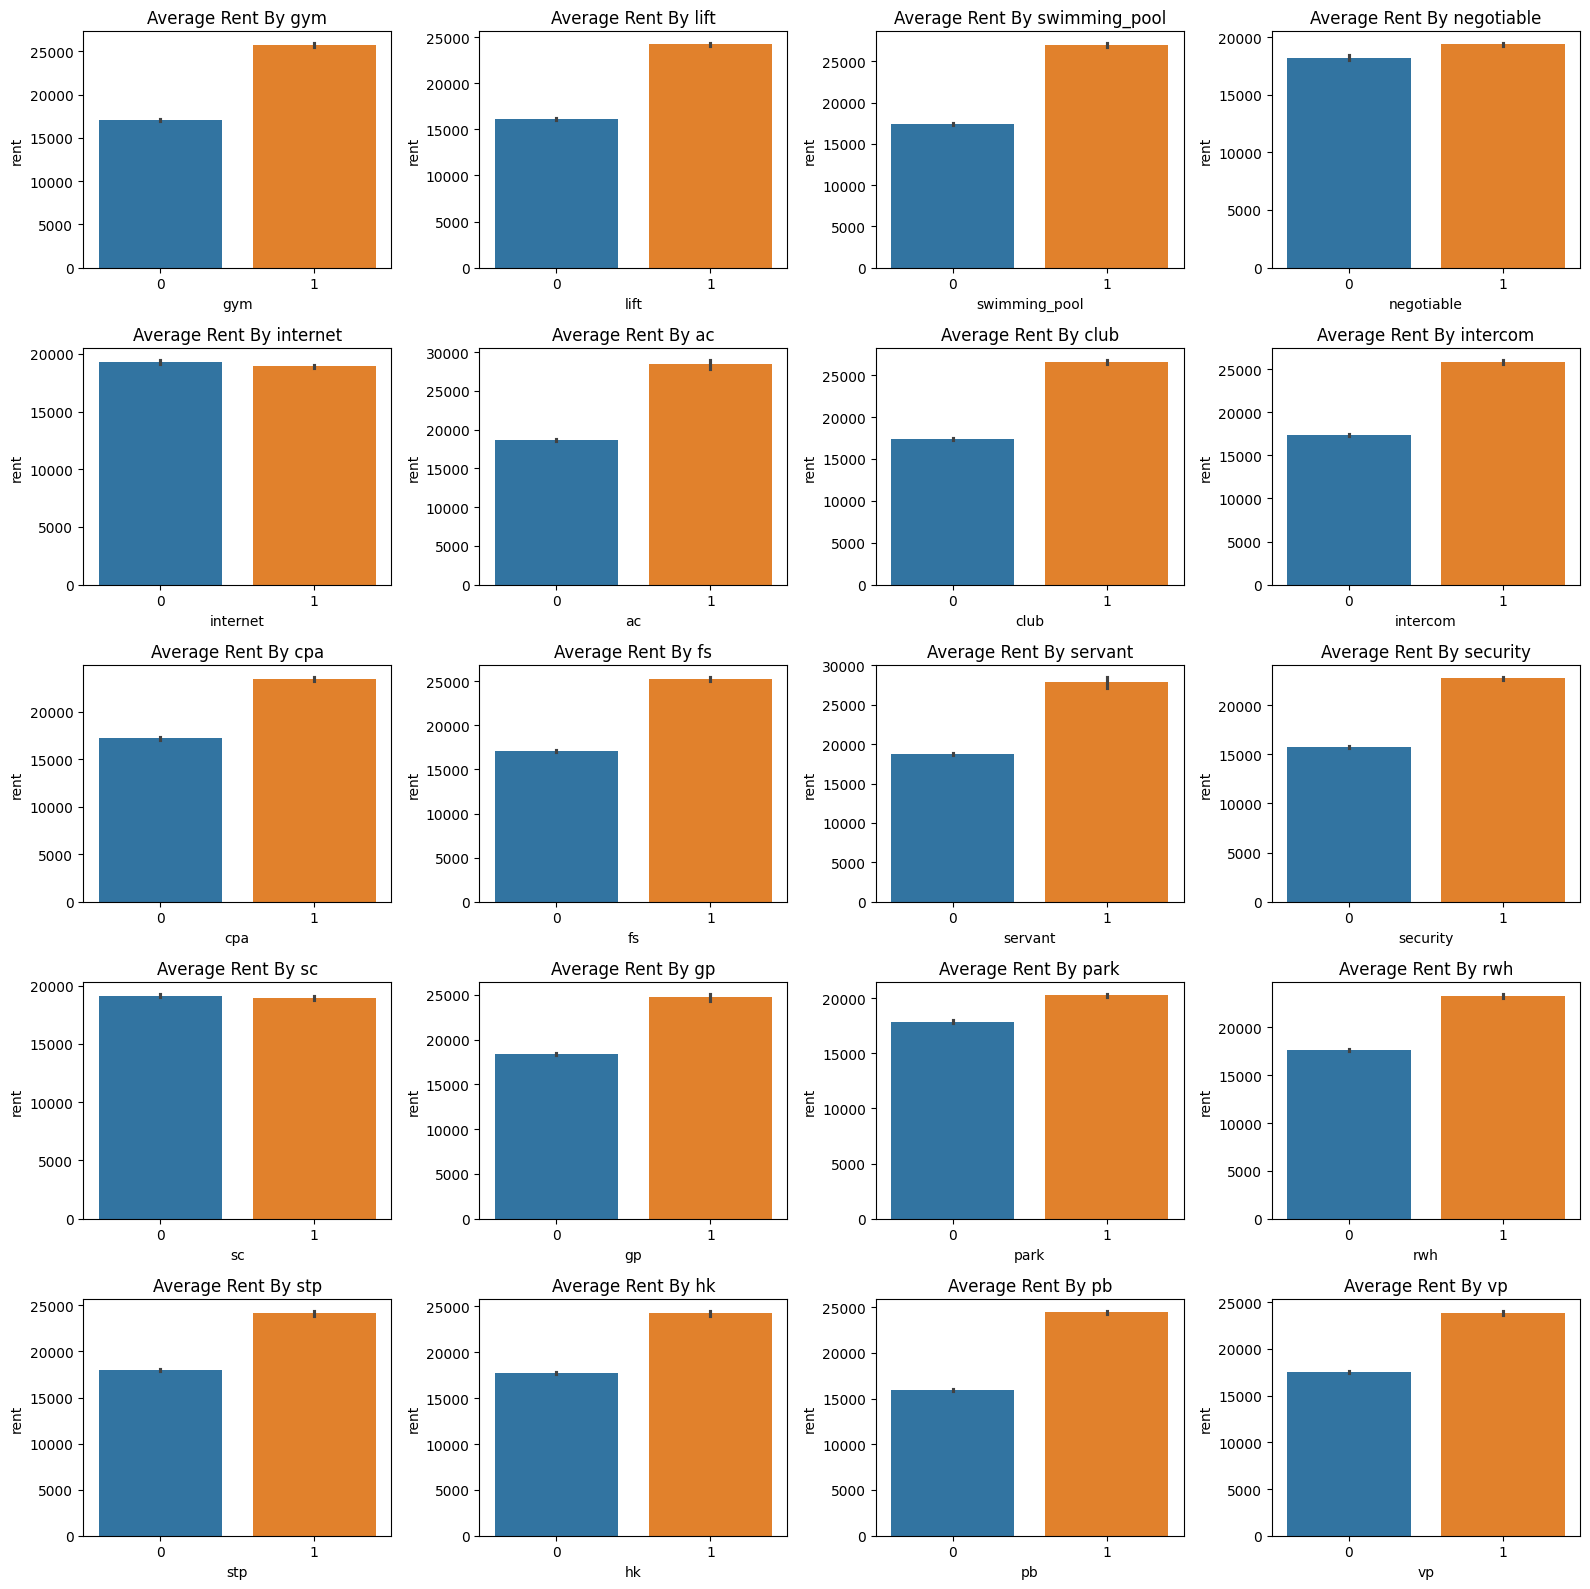

In [37]:
bool_columns = ['gym', 'lift', 'swimming_pool', 'negotiable', 'internet', 'ac', 'club', 'intercom', 'cpa', 'fs', 'servant',
                 'security', 'sc', 'gp', 'park', 'rwh', 'stp', 'hk', 'pb', 'vp']

amenities_plot(bool_columns)

In [38]:
train_df.drop(['internet', 'sc'], axis = 1, inplace = True)

In [39]:
train_df['total_amunities'] = train_df[['gym', 'lift', 'swimming_pool', 'negotiable', 'ac', 'club', 'intercom', 'cpa', 'fs', 'servant',
                 'security', 'gp', 'park', 'rwh', 'stp', 'hk', 'pb', 'vp']].sum(axis = 1)

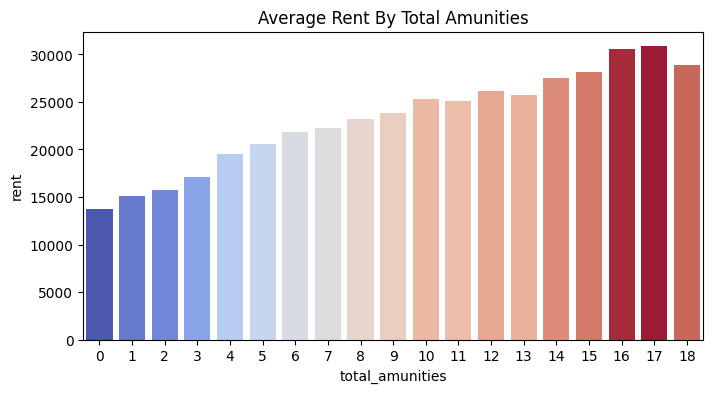

In [40]:
df =train_df.groupby('total_amunities')['rent'].mean().sort_values(ascending=True)

plt.figure(figsize = (8,4))
sns.barplot( x = df.index, y=df, hue = df,  palette = "coolwarm", legend = False)
plt.title('Average Rent By Total Amunities')
plt.show()

In [41]:
train_df.drop('locality', axis = 1, inplace = True)

<Axes: xlabel='activation_month'>

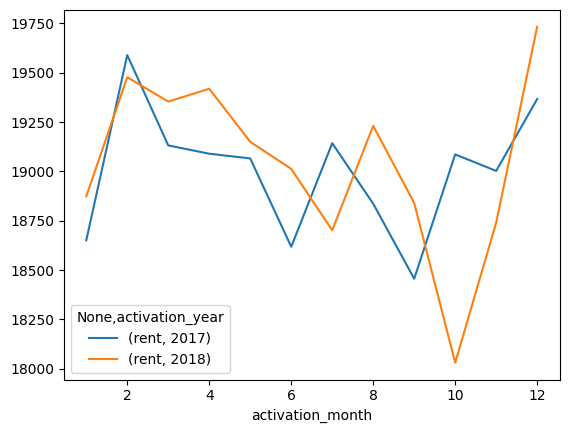

In [42]:
df = pd.pivot_table(train_df, values = ['rent'], columns=['activation_year'], index =['activation_month'])
df.plot(kind = 'line')

In [43]:
upperlimit = np.quantile(train_df['property_size'], q =0.75)
lowerlimit = np.quantile(train_df['property_size'], q =0.25)
iqr = upperlimit - lowerlimit

upperlimit = upperlimit +(1.5 * iqr)
lowerlimit = lowerlimit - (1.5 * iqr)
iqr, upperlimit, lowerlimit

# train_df['property_size'] = np.where(train_df[train_df['property_size']>2250], upperlimit,  train_df['property_size'])


# Create a boolean mask based on the condition
condition_mask = train_df['property_size'] > 2250

# Use the boolean mask in np.where to replace values
train_df['property_size'] = np.where(condition_mask, upperlimit, train_df['property_size'])

<Axes: xlabel='property_size'>

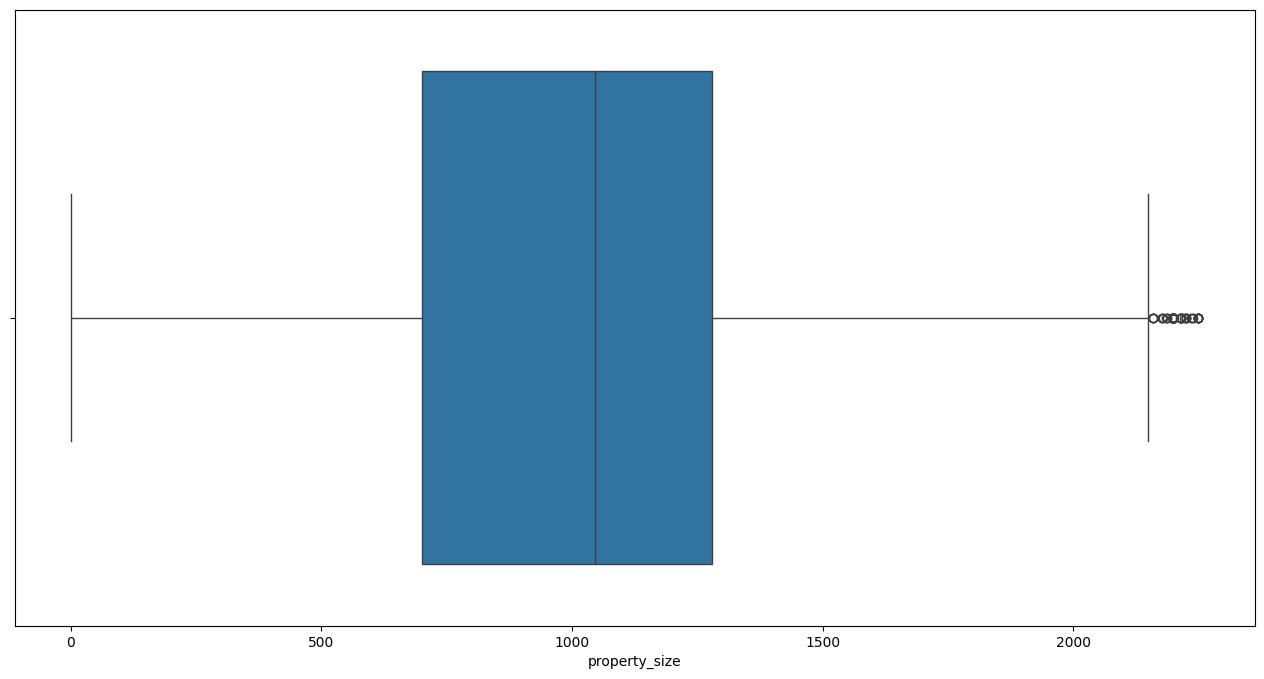

In [44]:
# upperlimit = np.quantile(train_df['property_age'], q =0.75)
train_df[train_df['property_size']<4000]
plt.figure(figsize=(16, 8))
sns.boxplot(train_df[train_df['property_size']<4000], x='property_size')
# plt.xlim(0, 2200)

# Modeling

In [46]:
df = train_df.copy()

enc = OrdinalEncoder()
df.head()

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,activation_year,activation_month,activation_day,ac,club,intercom,cpa,fs,servant,security,gp,park,rwh,stp,hk,pb,vp,total_amunities
0,BHK2,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400.0,4.0,2.0,NE,2.0,3.0,4.0,CORPORATION,AP,2.0,22000.0,2017,9,10,0,0,0,0,0,0,1,0,1,1,1,0,1,1,8
1,BHK3,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350.0,6.0,3.0,E,3.0,1.0,5.0,CORP_BORE,AP,3.0,28000.0,2018,12,6,0,0,0,1,0,0,0,0,1,0,0,0,1,1,5
2,BHK1,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600.0,3.0,1.0,E,1.0,1.0,2.0,CORPORATION,IH,0.0,8000.0,2018,7,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,BHK3,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500.0,15.0,3.0,E,4.0,0.0,0.0,CORPORATION,IH,1.0,45000.0,2018,5,31,0,0,0,1,0,0,0,0,1,0,0,0,0,1,4
4,BHK1,12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080.0,0.0,2.0,E,1.0,3.0,5.0,CORP_BORE,AP,2.0,18000.0,2017,10,24,0,1,0,1,1,0,1,0,0,0,0,0,1,0,9


In [47]:
unique_value = {}
for col_name in [i for i in df.columns if df[i].dtype =='object']:
    data = df[col_name].unique()
    data.sort()

    df[col_name] = enc.fit_transform(df[[col_name]])

    globals()[col_name] = {}
    for i in df[col_name].unique():
        globals()[col_name][data[int(i)]] = i
        unique_value[f'{col_name}'] = globals()[col_name]
unique_value

{'type': {'BHK2': 1.0,
  'BHK3': 2.0,
  'BHK1': 0.0,
  'RK1': 5.0,
  'BHK4': 3.0,
  'BHK4PLUS': 4.0},
 'lease_type': {'ANYONE': 0.0, 'FAMILY': 3.0, 'BACHELOR': 1.0, 'COMPANY': 2.0},
 'furnishing': {'SEMI_FURNISHED': 2.0,
  'FULLY_FURNISHED': 0.0,
  'NOT_FURNISHED': 1.0},
 'parking': {'BOTH': 0.0,
  'TWO_WHEELER': 3.0,
  'NONE': 2.0,
  'FOUR_WHEELER': 1.0},
 'facing': {'NE': 2.0,
  'E': 0.0,
  'S': 4.0,
  'N': 1.0,
  'SE': 5.0,
  'W': 7.0,
  'NW': 3.0,
  'SW': 6.0},
 'water_supply': {'CORPORATION': 1.0, 'CORP_BORE': 2.0, 'BOREWELL': 0.0},
 'building_type': {'AP': 0.0, 'IH': 3.0, 'IF': 2.0, 'GC': 1.0}}

In [48]:
# Write the unique_value dictionary to a JSON file with proper indentation
with open(r'dataset/Category_Columns_Encoded_Data.json', 'w') as file:
    json.dump(unique_value, file , indent = 4)

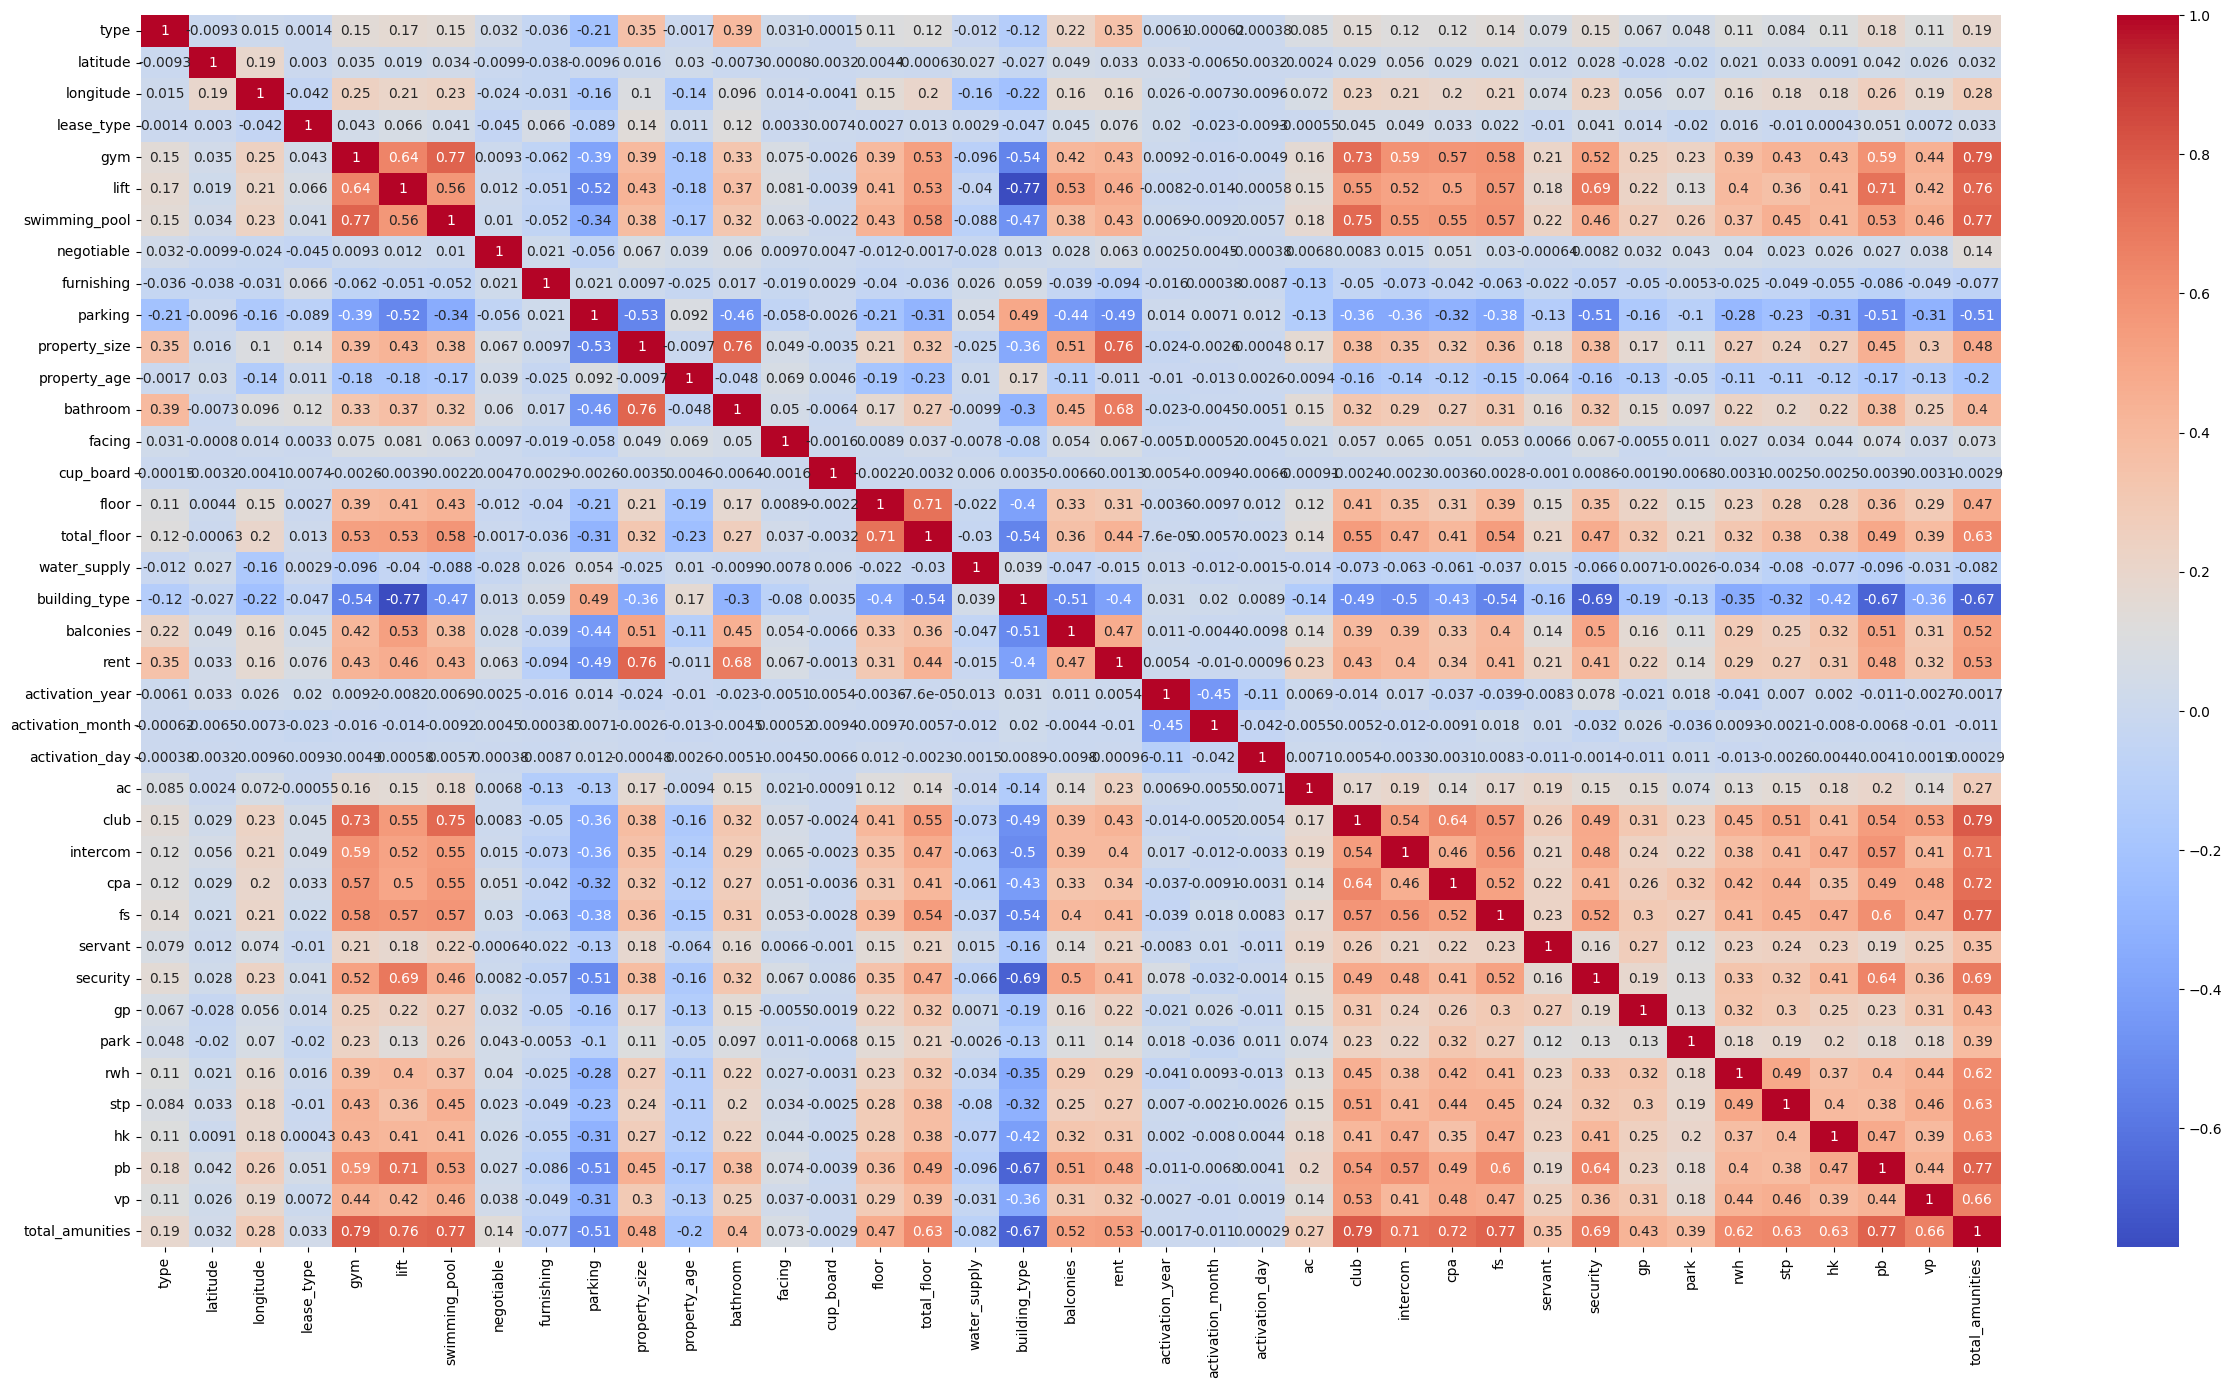

In [49]:
plt.figure(figsize= (30,16))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.show()

In [50]:
class regression:

    def __init__(self, x, y):
        # List of regression models to be evaluated
        self.models =[('AdaBoostRegressor', AdaBoostRegressor()),
                     ('RandomForestRegressor', RandomForestRegressor()),
                     ('ExtraTreesRegressor', ExtraTreesRegressor()),
                     ('GradientBoostingRegressor', GradientBoostingRegressor()),
                     ('HistGradientBoostingRegressor', HistGradientBoostingRegressor()),
                     ('DecisionTreeRegressor', DecisionTreeRegressor()),
                     ('XGBRegressor', XGBRegressor()),
                     ('LinearRegression', LinearRegression()),
                     ('KNeighborsRegressor', KNeighborsRegressor()),
                     ('MLPRegressor', MLPRegressor()),
                     ]
        # Split the data into training and testing sets
        self.x_train, self.x_test, self.y_train,self.y_test = train_test_split(x,y,test_size=0.2, random_state = 42)

    def all_model(self):
        # Train and evaluate each model
        print(self.x_train.shape, self.x_test.shape, self.y_train.shape, self.y_test.shape)
        result = []
        for model_name, model in self.models:
            model.fit(self.x_train, self.y_train)
            y_test_pred = model.predict(self.x_test)
            y_train_pred = model.predict(self.x_train)

            data ={'Model_Name': model_name,
                    'Train_Mean_Square_Error': round(mean_squared_error(self.y_train, y_train_pred),4),
                    'Test_Mean_Square_Error': round(mean_squared_error(self.y_test, y_test_pred),4),
                    'Train_Root_Mean_Square_Error': round(np.sqrt(mean_squared_error(self.y_train, y_train_pred)),2),
                    'Test_Root_Mean_Square_Error': round(np.sqrt(mean_squared_error(self.y_test, y_test_pred)),2),
                    'Train_Mean_Absolute_Error': round(mean_absolute_error(self.y_train, y_train_pred),4),
                    'Test_Mean_Absolute_Error': round(mean_absolute_error(self.y_test, y_test_pred),4),
                    'Train_R2_Score': round(r2_score(self.y_train, y_train_pred ),4),
                    'Test_R2_Score': round(r2_score(self.y_test, y_test_pred), 4)}
            result.append(data)

        self.model_score_df = pd.DataFrame(result)

        return self.model_score_df

In [51]:

# Defining Independent and dependent variable

y = df['rent']
x = df.drop(['rent', 'total_amunities'], axis =1)

In [52]:
# Initialize and train regression models, then evaluate their performance

regression_models = regression(x,y)
r_models = regression_models.all_model()
r_models

(16285, 37) (4072, 37) (16285,) (4072,)


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model_Name,Train_Mean_Square_Error,Test_Mean_Square_Error,Train_Root_Mean_Square_Error,Test_Root_Mean_Square_Error,Train_Mean_Absolute_Error,Test_Mean_Absolute_Error,Train_R2_Score,Test_R2_Score
0,AdaBoostRegressor,3.139281e+07,3.382838e+07,5602.93,5816.22,4685.9801,4841.8510,0.5596,0.5202
1,RandomForestRegressor,1.947142e+06,1.411675e+07,1395.40,3757.23,973.6794,2625.2424,0.9727,0.7998
2,ExtraTreesRegressor,0.000000e+00,1.598525e+07,0.00,3998.16,0.0000,2842.8162,1.0000,0.7733
3,GradientBoostingRegressor,1.380519e+07,1.553052e+07,3715.53,3940.88,2697.2044,2809.1749,0.8063,0.7797
4,HistGradientBoostingRegressor,9.179982e+06,1.311073e+07,3029.85,3620.87,2212.8250,2531.6226,0.8712,0.8140
5,DecisionTreeRegressor,0.000000e+00,2.908248e+07,0.00,5392.82,0.0000,3751.7385,1.0000,0.5875
6,XGBRegressor,4.955081e+06,1.340270e+07,2226.00,3660.97,1655.6126,2555.8499,0.9305,0.8099
7,LinearRegression,2.304365e+07,2.420043e+07,4800.38,4919.39,3555.7548,3620.1046,0.6767,0.6567
8,KNeighborsRegressor,1.939927e+07,3.059959e+07,4404.46,5531.69,3225.5104,4024.7690,0.7278,0.5660
9,MLPRegressor,2.385384e+07,2.507768e+07,4884.04,5007.76,3592.8608,3671.1240,0.6653,0.6443


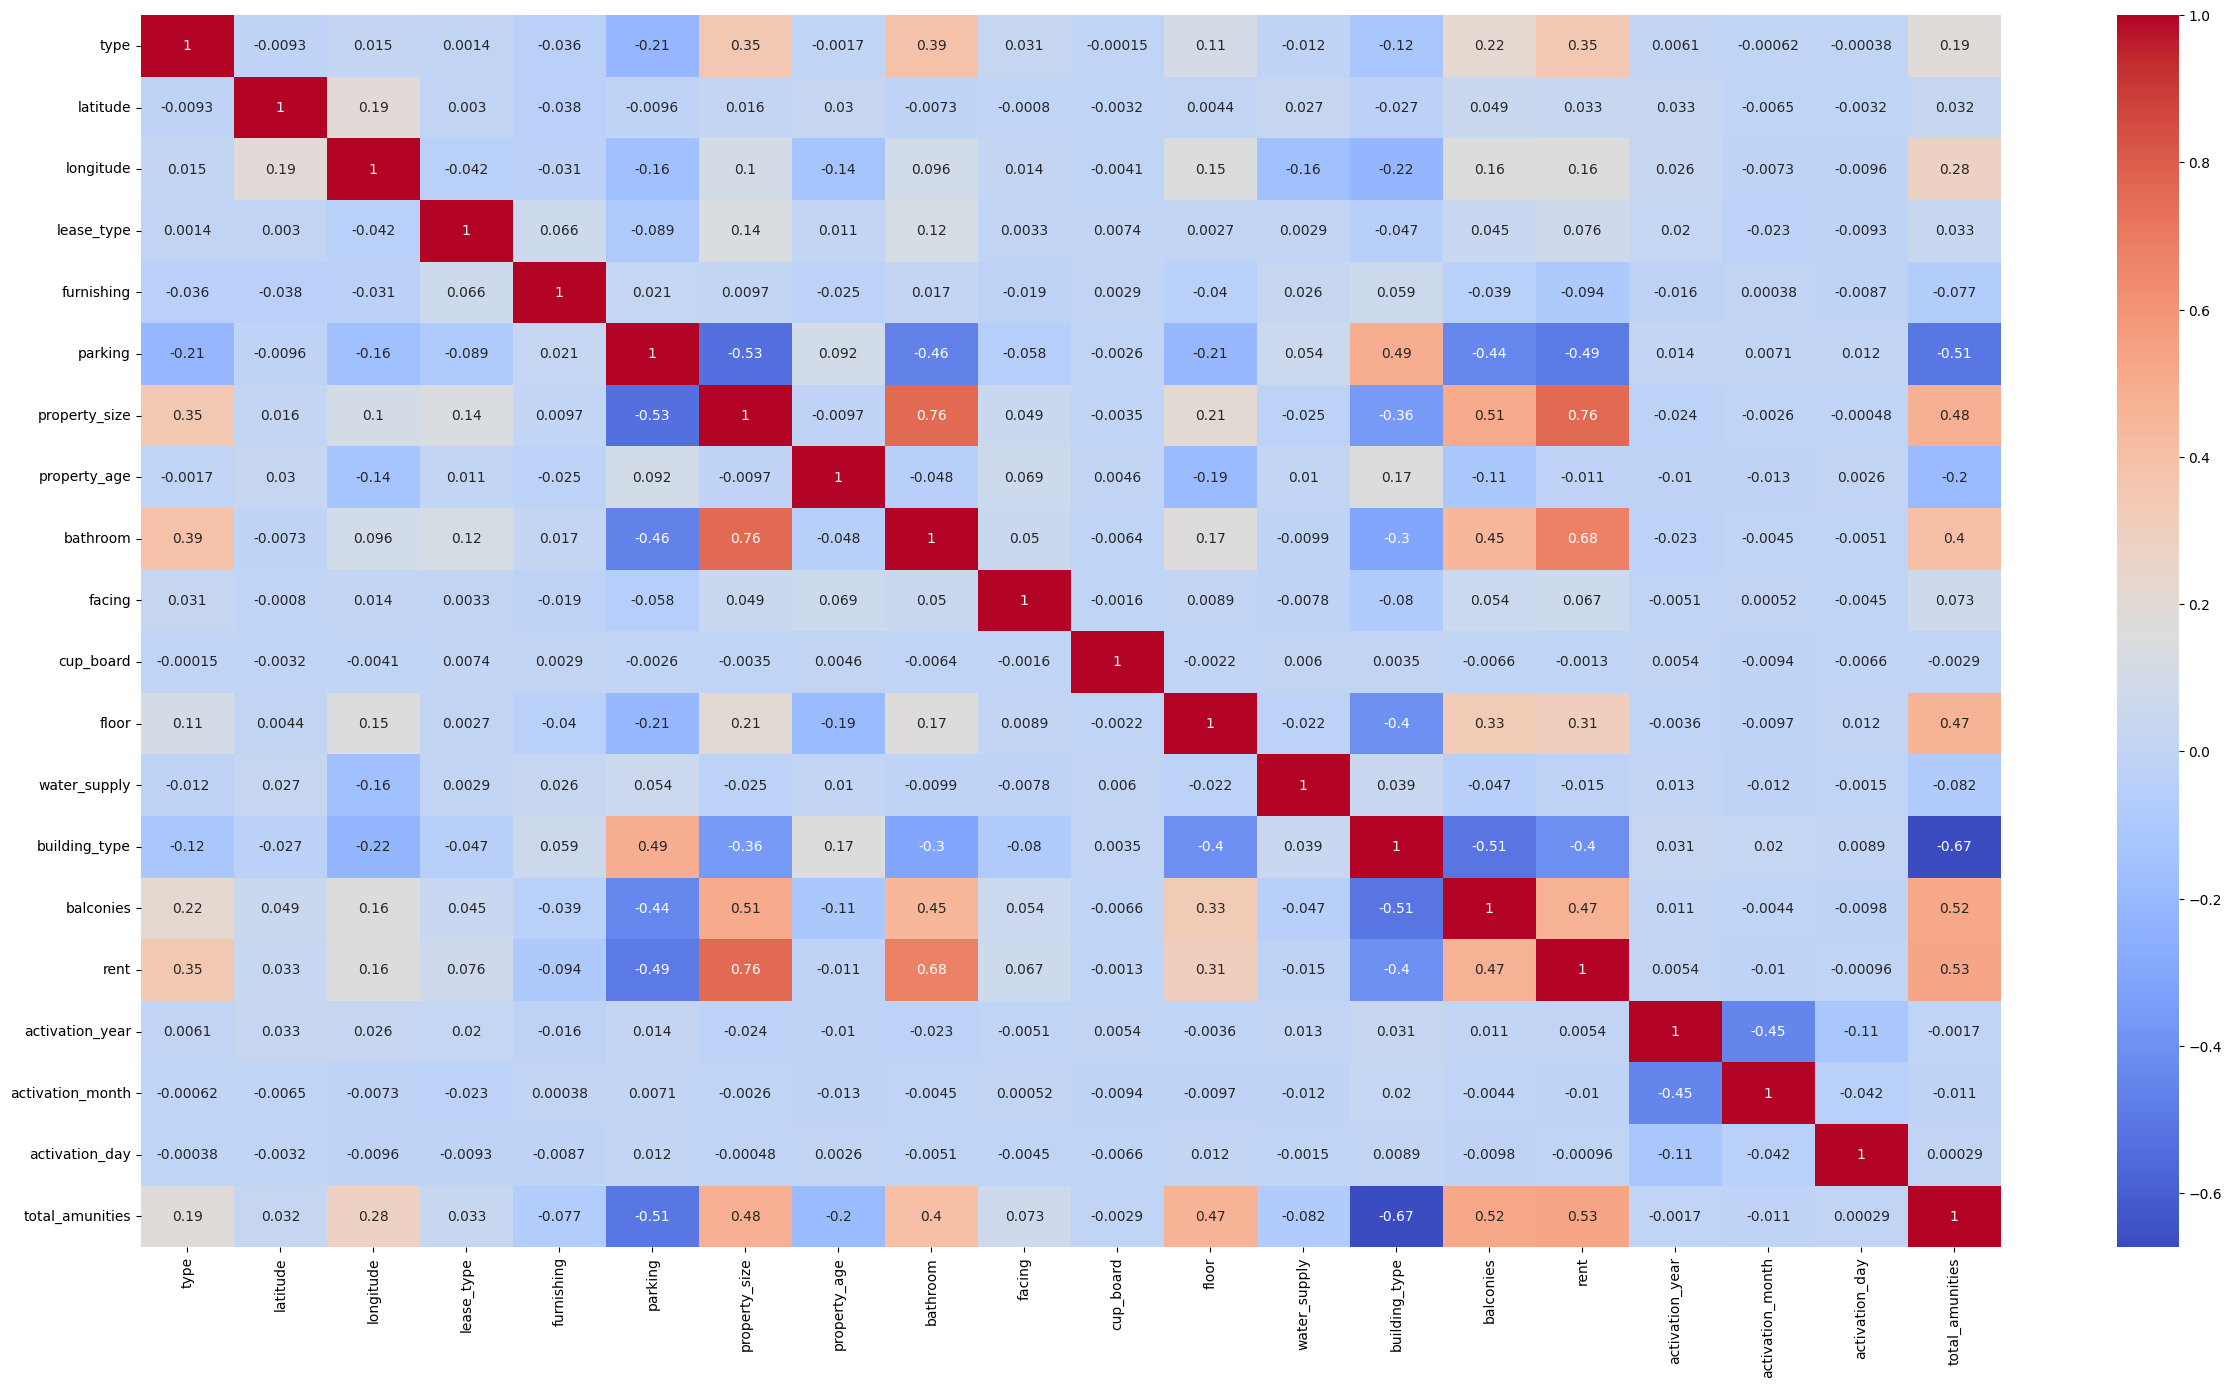

In [53]:
df1 = df.copy()
df1.drop([ 'total_floor','gym', 'lift', 'swimming_pool', 'negotiable', 'ac', 'club', 'intercom', 'cpa', 'fs', 'servant',
                 'security', 'gp', 'park', 'rwh', 'stp', 'hk', 'pb', 'vp'], axis = 1, inplace = True)

plt.figure(figsize= (30,16))
sns.heatmap(df1.corr(), annot = True, cmap='coolwarm')
plt.show()

In [54]:

y = df1['rent']
x = df1.drop('rent', axis =1)
x.head()

,type,latitude,longitude,lease_type,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,water_supply,building_type,balconies,activation_year,activation_month,activation_day,total_amunities
0,1.0,12.929557,77.672280,0.0,2.0,0.0,1400.0,4.0,2.0,2.0,2.0,3.0,1.0,0.0,2.0,2017,9,10,8
1,2.0,12.982870,80.262012,3.0,2.0,0.0,1350.0,6.0,3.0,0.0,3.0,1.0,2.0,0.0,3.0,2018,12,6,5
2,0.0,12.955991,77.531634,3.0,2.0,3.0,600.0,3.0,1.0,0.0,1.0,1.0,1.0,3.0,0.0,2018,7,20,1
3,2.0,12.963903,77.649446,3.0,2.0,0.0,1500.0,15.0,3.0,0.0,4.0,0.0,1.0,3.0,1.0,2018,5,31,4
4,0.0,12.986196,77.718314,3.0,2.0,0.0,1080.0,0.0,2.0,0.0,1.0,3.0,2.0,0.0,2.0,2017,10,24,9


In [55]:
regression_models = regression(x,y)
r_models = regression_models.all_model()
r_models

(16285, 19) (4072, 19) (16285,) (4072,)


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model_Name,Train_Mean_Square_Error,Test_Mean_Square_Error,Train_Root_Mean_Square_Error,Test_Root_Mean_Square_Error,Train_Mean_Absolute_Error,Test_Mean_Absolute_Error,Train_R2_Score,Test_R2_Score
0,AdaBoostRegressor,3.232705e+07,3.429762e+07,5685.69,5856.42,4743.4437,4859.4540,0.5465,0.5135
1,RandomForestRegressor,2.028861e+06,1.472188e+07,1424.38,3836.91,999.4589,2707.0148,0.9715,0.7912
2,ExtraTreesRegressor,6.140000e-02,1.633529e+07,0.25,4041.69,0.0037,2870.7029,1.0000,0.7683
3,GradientBoostingRegressor,1.445144e+07,1.614587e+07,3801.50,4018.19,2758.9223,2880.4945,0.7973,0.7710
4,HistGradientBoostingRegressor,9.909480e+06,1.357125e+07,3147.93,3683.92,2295.8256,2600.0643,0.8610,0.8075
5,DecisionTreeRegressor,0.000000e+00,3.043057e+07,0.00,5516.39,0.0000,3838.6950,1.0000,0.5684
6,XGBRegressor,5.436137e+06,1.393869e+07,2331.55,3733.45,1724.8880,2615.6308,0.9237,0.8023
7,LinearRegression,2.401583e+07,2.531522e+07,4900.60,5031.42,3635.5441,3729.8330,0.6631,0.6409
8,KNeighborsRegressor,1.948519e+07,3.046590e+07,4414.20,5519.59,3231.5824,4028.8740,0.7266,0.5678
9,MLPRegressor,2.462440e+07,2.602243e+07,4962.30,5101.22,3641.0158,3731.5018,0.6545,0.6309


In [56]:
train_x, test_x, train_y, test_y = regression_models.x_train, regression_models.x_test, regression_models.y_train, regression_models.y_test
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((16285, 19), (4072, 19), (16285,), (4072,))

In [57]:
hgb_regression = HistGradientBoostingRegressor().fit(train_x, train_y)
y_train_pred = hgb_regression.predict(train_x)
y_test_pred = hgb_regression.predict(test_x)

data = {'Train R2 Score': r2_score(train_y, y_train_pred),
        'Test R2 Score': r2_score(test_y, y_test_pred),
        'Train MAE': mean_absolute_error(train_y, y_train_pred),
        'Test MAE': mean_absolute_error(test_y, y_test_pred)}
data

{'Train R2 Score': 0.8602767705638769,
 'Test R2 Score': 0.8077522703516635,
 'Train MAE': 2293.514960290321,
 'Test MAE': 2597.933831352924}

In [58]:

# Define the model
model = HistGradientBoostingRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 3, 5],
    'l2_regularization': [0.0, 0.1, 0.2]
}

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(train_x, train_y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(train_x, train_y)

# Evaluate the model on the test set
y_pred = best_model.predict(test_x)
mse = mean_squared_error(test_y, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Mean Squared Error on Test Set: {mse}")


Best Hyperparameters: {'l2_regularization': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 300, 'min_samples_leaf': 5}
Mean Squared Error on Test Set: 13600924.209263714


In [60]:
# Creating HistGradientBoostingRegressor Model with hyperparameter
hgb_regression = HistGradientBoostingRegressor( l2_regularization = 0.1, 
                                               learning_rate = 0.1, 
                                               max_depth = 7, 
                                               max_iter = 300, 
                                               min_samples_leaf = 5).fit(train_x, train_y)
y_train_pred = hgb_regression.predict(train_x)
y_test_pred = hgb_regression.predict(test_x)

data = {'Train R2 Score': r2_score(train_y, y_train_pred),
        'Test R2 Score': r2_score(test_y, y_test_pred),
        'Train MAE': mean_absolute_error(train_y, y_train_pred),
        'Test MAE': mean_absolute_error(test_y, y_test_pred)}
data

{'Train R2 Score': 0.8659759040889891,
 'Test R2 Score': 0.8064960189813453,
 'Train MAE': 2268.765835123177,
 'Test MAE': 2614.2441404588594}

In [61]:
test_df = pd.read_excel(r'dataset/House_Rent_Test.xlsx')

In [62]:
def preprocessing_for_test(test_df):
    test_df.activation_date = pd.to_datetime(test_df['activation_date'] )

    test_df['activation_year'] = test_df['activation_date'].dt.year
    test_df['activation_month'] = test_df['activation_date'].dt.month
    test_df['activation_day'] = test_df['activation_date'].dt.day

    # To Exatract the amenities value into new dataframe
    test_df.amenities.apply(lambda x: json.loads(x))
    amenities_df = pd.DataFrame(test_df.amenities.apply(lambda x: json.loads(x)).tolist())
    amenities_df.columns = [col.lower() for col in amenities_df.columns]

    amenities_df.drop(['lift', 'gym', 'pool'], axis=1, inplace = True)

    #converting boolean values into numerical value
    for col in amenities_df.columns:
        amenities_df[col] = amenities_df[col].apply(lambda x: 1 if x == True else 0)

    test_df = pd.concat([test_df, amenities_df], axis = 1)
    test_df.drop('amenities', axis = 1, inplace = True)
    # finding Total amunities
    test_df['total_amunities'] = test_df[['gym', 'lift', 'swimming_pool', 'negotiable', 'ac', 'club', 'intercom', 'cpa', 'fs', 'servant',
                    'security', 'gp', 'park', 'rwh', 'stp', 'hk', 'pb', 'vp']].sum(axis = 1)
    
    test_df.drop(['id', 'locality', 'activation_date','internet', 'sc', 'total_floor','gym', 'lift', 'swimming_pool', 'negotiable', 'ac',
                   'club', 'intercom', 'cpa', 'fs', 'servant','security', 'gp', 'park', 'rwh', 'stp', 'hk', 'pb', 'vp'], axis = 1, inplace = True)
    
    return test_df


In [64]:
def to_mapping(test_df):
    with open(r'dataset/Category_Columns_Encoded_Data.json', 'r') as file:
        data = json.load(file)
    for col_name in [i for i in test_df.columns if test_df[i].dtype =='object']:
        mapping_data = data[col_name]
        test_df[col_name] = test_df[col_name].map(mapping_data)
    return test_df


In [65]:
test_df = to_mapping(preprocessing_for_test(test_df))
test_df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9488\4168113094.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  test_df.activation_date = pd.to_datetime(test_df['activation_date'] )


,type,latitude,longitude,lease_type,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,water_supply,building_type,balconies,activation_year,activation_month,activation_day,total_amunities
0,1.0,12.941603,77.568156,3.0,2.0,0.0,1300,1,2,1.0,2,3,2.0,0.0,1,2017,8,22,4
1,1.0,12.998803,77.561887,0.0,2.0,3.0,600,7,1,4.0,2,0,1.0,2.0,0,2017,9,17,3
2,0.0,12.966467,77.661063,0.0,2.0,3.0,600,10,1,4.0,1,0,1.0,2.0,0,2018,4,14,4
3,0.0,12.941533,77.592606,0.0,1.0,3.0,500,8,1,0.0,0,2,2.0,2.0,0,2017,11,12,0
4,2.0,12.971083,77.751625,0.0,2.0,0.0,1400,0,3,0.0,3,3,0.0,0.0,1,2017,11,7,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,1.0,12.941654,77.559999,3.0,2.0,0.0,950,2,2,1.0,2,3,2.0,2.0,2,2018,10,6,2
4496,1.0,12.942973,77.597738,0.0,2.0,3.0,750,10,1,1.0,2,2,1.0,2.0,1,2018,1,21,1
4497,0.0,12.949315,77.713807,0.0,2.0,2.0,500,10,1,7.0,1,2,2.0,3.0,0,2018,5,30,2
4498,2.0,12.914104,77.716428,3.0,2.0,0.0,1450,1,3,1.0,4,10,0.0,0.0,3,2018,11,7,9


In [68]:
y_pred = hgb_regression.predict(test_df)


In [70]:
pred =pd.DataFrame(y_pred, columns = ['Predicted_Rent'])
pred

,Predicted_Rent
0,22689.851805
1,11826.141418
2,11330.004537
3,9867.783097
4,27335.612632
...,...
4495,17258.257075
4496,14875.291399
4497,10574.738323
4498,27590.118108


In [71]:
pred.to_excel(r'dataset/Predicted_Rent_for_Test.xlsx', index = False)

In [73]:

with open('Rental_Property_Price_Prediction_Model.pkl', 'wb') as file:
    pickle.dump(hgb_regression, file) 

In [74]:
# Load the Decision Tree model from the file
with open('Rental_Property_Price_Prediction_Model.pkl', 'rb' ) as file:
    model = pickle.load(file)

In [76]:
model.predict(test_df.iloc[0:2])

array([22689.85180518, 11826.14141796])